## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

In [2]:
from scipy import stats

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.columns

Index([u'temperature', u'gender', u'heart_rate'], dtype='object')

In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [7]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


### Q1:
1.Is the distribution of body temperatures normal?
- Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

### A1: Yes, the distribution of body temperatures is normal.

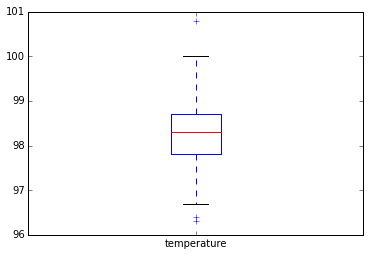

In [8]:
# *Although sometimes used to check normality, boxplots should not be used to assess normality*

df['temperature'].plot(kind='box')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CAD8780>]], dtype=object)

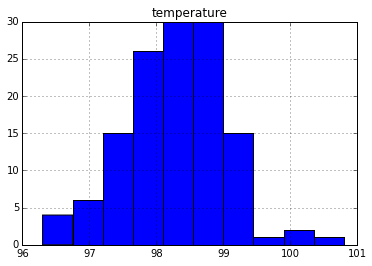

In [9]:
# *Histograms and qq plots are better for assessing normality*

df.hist('temperature')

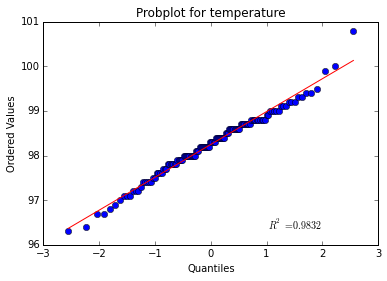

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['temperature'],plot=ax)
ax.set_title("Probplot for temperature")
plt.show()

### Q2:

2.Is the true population mean really 98.6 degrees F?

- Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?



$H_o: \mu = 98.6 ^oF$

$H_a: \mu \ne 98.6^oF$


### A2: No, the true population mean is probably not really 98.6 degrees F. We have extremely strong evidence to reject Ho in favor of the alternative hypothesis that the population mean differs from 98.6 degrees F. (p-value nearly 0)

In this situation, is it approriate to apply a z-test or a t-test?
- In this case, either test is approriate to apply; for large samples, the t and z distributions are nearly equivalent and the sample std can be substituted for the population std.  

How will the result be different? 
-  In this case, the z-score/-statistic/-value should be nearly equivalent to the t-score/-statistic/-value, and thecorresponding p-values should be nearly equivalent.

In [11]:
tstat,pval = stats.ttest_1samp(df['temperature'],98.6)
print tstat,round(pval/2,5)

-5.45482329236 0.0


In [12]:
xbar = df['temperature'].mean()
xbar

98.24923076923078

In [13]:
std = df['temperature'].std()
std

0.7331831580389454

In [14]:
zscore = (xbar-98.6)/(std/math.sqrt(130))
zscore

-5.454823292364079

### Q3:

3.At what temperature should we consider someone's temperature to be "abnormal"?

- Start by computing the margin of error and confidence interval.

### A3: We should consider someone's temperature to be "abnormal" when it is below 98.06 degrees F or above 98.44 degrees F.

3.At what temperature should we consider someone's temperature to be "abnormal"?

- Using a definition of "abnormal" to be 3 standard deviations. CI = (98.06, 98.44)

In [15]:
SE = std/math.sqrt(130)
SE

0.06430441683789101

In [16]:
ME = 3*SE
ME

0.19291325051367303

In [17]:
CI = (round(xbar-ME,2),round(xbar+ME,2))
CI

(98.06, 98.44)

### Q4:

4.Is there a significant difference between males and females in normal temperature?

- Set up and solve for a two sample hypothesis testing.

### A4: There is insufficient evidence to reject Ho in favor of Ha (at the 0.01 level of significance); there is no significant difference between males and females in normal temperature.

4.Is there a significant difference between males and females in normal temperature?

- Set up and solve for a two sample hypothesis testing.


$H_o: \mu_f = \mu_m$

$H_a: \mu_f \ne \mu_m$


**Temp data by gender**

In [18]:
gender_df = df.groupby('gender')

In [19]:
gender_df.groups.keys()

['M', 'F']

gender
F    Axes(0.125,0.125;0.775x0.775)
M    Axes(0.125,0.125;0.775x0.775)
Name: temperature, dtype: object

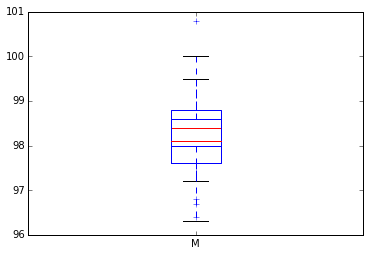

In [20]:
gender_df['temperature'].plot(kind='box')

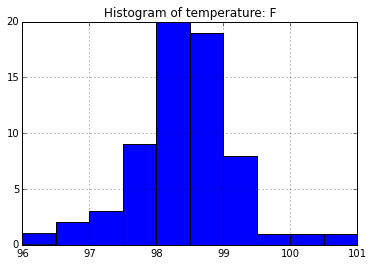

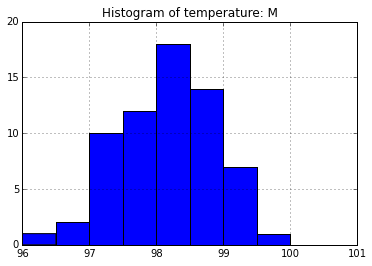

In [21]:

for key, grp in gender_df:
    grp.hist('temperature',bins = 10, range=(96,101),label=key)
    plt.ylim(0,20)
    plt.title(r'Histogram of temperature: {0}'.format(key))
plt.show()


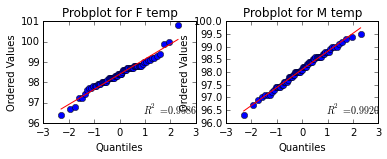

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax = {'F':ax1,'M':ax2}

for key, grp in gender_df:
    stats.probplot(grp['temperature'],plot=ax[key])
    ax[key].set_title("Probplot for {0} temp".format(key))
plt.show()

In [23]:
gender_df['temperature'].std()

gender
F    0.743488
M    0.698756
Name: temperature, dtype: float64

In [24]:
Ftemp = df[df.gender=='F']['temperature']
Mtemp = df[df.gender=='M']['temperature']

In [25]:
# Test for equal variance

# Since the distributions are approximately normal, use Bartlett test:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html#scipy.stats.bartlett

# rather than Levene test:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

stats.bartlett(Ftemp,Mtemp)

(0.24435409134361702, 0.62107889633573721)

In [26]:
# Variances are unequal

#stats.ttest_ind(Ftemp,Mtemp)
stats.ttest_ind(Ftemp,Mtemp,equal_var = False)

(2.2854345381656112, 0.023938264182934196)